### The amount of information is:

# the minimum number of (yes/no) questions you would expect (on average) to ask to guess the next symbol in the message. 
## So the more questions we have to ask (on average), the more information the messge contains, and the higher the uncertainty **per symbol** there is.

For example, we have a message of length 4 whose symbols come from the the set $\{A, B, C, D\}$. If the symbols are equiprobable, we have to ask (on average) two questions per symbol to encode/decode the message. I.e. the uncertainty of the message is 2 bits per symbol. However, if the probability of these symbols occurring is different, e.g. $[0.5, 0.125, 0.125, 0.25]$, the first question we ask would be "Is it A?" to eliminate the most likely option. Thus, we have to ask fewer question to decode/encode the message (actually, 1.75 bits(questions)/symbol)


# If data has a pointy distribution, it contains less information and less uncertainty

## suppose we have two messges with the same number of symbols. In the first message, the symbols are equiprobable, in the second have a slightly different distribution

- x = {0.25, 0.25, 0.25, 0.25}
- y = {0.5, 0.125, 0.125, 0.25}

## which one of them has more information?

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# https://www.khanacademy.org/computing/computer-science/informationtheory/moderninfotheory/v/information-entropy

x = np.array([0.25, 0.25, 0.25, 0.25])
y = np.array([0.5, 0.125, 0.125, 0.25])

print('{:.2f} bits'.format(-np.sum(x*np.log2(x))))
print('{:.2f} bits'.format(-np.sum(y*np.log2(y))))

2.00 bits
1.75 bits


## Turns out that the first one does. In other words, it requires more bits to transmit the same message.

## Conditional Entropy
Conditional entropy is the amount of information (i.e. number of bits) needed to describe a codeword $\tilde x \in {\tilde X}$  given that the value of the input variable $x \in X$ is known. The entropy goes to zero if there's a unique mapping between each $x$ and $\tilde x$

## Average Volume

$$\boxed{
2^{H(X|\tilde X)}
}$$

is the number of elements in $X$ that are mapped to the same codeword in $ \tilde X$ 

Conditional entropy: 0.00002
Average volume of elements of X mapped to the same element of X_tilde: 1.00


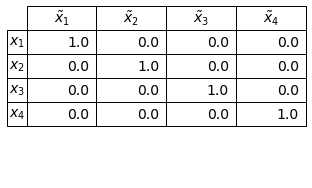

In [5]:
Px = np.array([0.25,0.25,0.25,0.25])
H = 0
k = 0.999999
pxx = np.eye(4)*np.diag(np.repeat(k, 4)) + np.ones((4,4))*(1-k)/3 - np.diag(np.repeat((1-k)/3, 4)).astype('float32')

plt.figure(figsize=(5,1))
table = plt.table(cellText=np.round(pxx, 3),
          rowLabels=['$x_1$', '$x_2$', '$x_3$', '$x_4$'],
          colLabels=['$ \~{x}_1$', '$\~{x}_2$', '$\~{x}_3$', '$\~{x}_4$'],
          loc='top')
plt.gca().axis('off')
table.scale(1,2)
table.set_fontsize(14)

for x in range(4):
    for x_ in range(4):
        H -= Px[x] * pxx[x_, x] * np.log2(pxx[x_, x])
print('Conditional entropy: {:.5f}'.format(H))
print('Average volume of elements of X mapped to the same element of X_tilde: {:.2f}'.format(2**H))

## Now the same thing, but the softest partitioning possible
#### I.e. there is no unambiguous correspondence between $x_i$ and $\tilde{x}_i$, and each $x_i$ corresponds to an average of 4 $\tilde{x}_i$

Conditional entropy: 2.00000
Average volume of elements of X mapped to the same element of X_tilde: 4.00


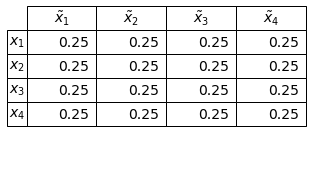

In [6]:
Px = np.array([0.25,0.25,0.25,0.25])
H = 0
k = 0.25
pxx = np.eye(4)*np.diag(np.repeat(k, 4)) + np.ones((4,4))*(1-k)/3 - np.diag(np.repeat((1-k)/3, 4)).astype('float32')

plt.figure(figsize=(5,1))
table = plt.table(cellText=np.round(pxx, 3),
          rowLabels=['$x_1$', '$x_2$', '$x_3$', '$x_4$'],
          colLabels=['$ \~{x}_1$', '$\~{x}_2$', '$\~{x}_3$', '$\~{x}_4$'],
          loc='top')
plt.gca().axis('off')
table.scale(1,2)
table.set_fontsize(14)

for x in range(4):
    for x_ in range(4):
        H -= Px[x] * pxx[x_, x] * np.log2(pxx[x_, x])
print('Conditional entropy: {:.5f}'.format(H))
print('Average volume of elements of X mapped to the same element of X_tilde: {:.2f}'.format(2**H))